In [ ]:
//@version=5
indicator("3-Candle Pattern Highlighter (1-Minute Only)", overlay=true, max_boxes_count=500, max_lines_count=500, max_labels_count=500)

// ─────────── Restrict to 1-Minute Timeframe
is_1m = timeframe.period == "1"

// ─────────── Candle Data
o = open
h = high
l = low
c = close

// ─────────── Utility Functions
isBull(c_, o_) => c_ > o_
isBear(c_, o_) => c_ < o_

// ─────────── Pattern Logic
bear3cp_t1 = isBull(c[2], o[2]) and isBear(c[1], o[1]) and c[1] > o[2] and isBear(c, o) and c < o[2] and c < c[1]
bear3cp_t2 = isBull(c[2], o[2]) and isBear(c[1], o[1]) and c[1] < o[2] and isBear(c, o) and c < o[2] and c < c[1]
bull3cp_t1 = isBear(c[2], o[2]) and isBull(c[1], o[1]) and c[1] < o[2] and isBull(c, o) and c > o[2] and c > c[1]
bull3cp_t2 = isBear(c[2], o[2]) and isBull(c[1], o[1]) and c[1] > o[2] and isBull(c, o) and c > o[2] and c > c[1]

// ─────────── Persistent Arrays
var box[] boxes = array.new_box()
var line[] lines = array.new_line()

// ─────────── Draw Helper Function
drawBoxAndLine(cond, baseOpen, baseClose, baseBar, extendBars, colorFill) =>
    if is_1m and cond
        top = math.max(baseOpen, baseClose)
        bottom = math.min(baseOpen, baseClose)
        mid = (top + bottom) / 2
        x1 = baseBar
        x2 = baseBar + extendBars
        bx = box.new(left=x1, right=x2, top=top, bottom=bottom, bgcolor=color.new(colorFill, 95), border_color=colorFill)
        ln = line.new(x1=x1, x2=x2, y1=mid, y2=mid, color=colorFill, width=1, style=line.style_dotted)
        array.push(boxes, bx)
        array.push(lines, ln)

// ─────────── Draw for Each Pattern (only on 1-minute)
drawBoxAndLine(bear3cp_t1, o[1], c[1], bar_index[1], 5, color.rgb(0, 0, 0, 95))
drawBoxAndLine(bear3cp_t2, o[2], c[2], bar_index[2], 6, color.rgb(0, 0, 0, 95))
drawBoxAndLine(bull3cp_t1, o[1], c[1], bar_index[1], 5, color.rgb(0, 0, 0, 95))
drawBoxAndLine(bull3cp_t2, o[2], c[2], bar_index[2], 6, color.rgb(0, 0, 0, 95))

//// ─────────── Plot Shapes (only on 1-minute)
//plotshape(is_1m and bear3cp_t1, title="↓1", text="↓1", style=shape.triangledown, location=location.abovebar, color=color.rgb(0, 0, 0, 80), size=size.tiny)
//plotshape(is_1m and bear3cp_t2, title="↓2", text="↓2", style=shape.triangledown, location=location.abovebar, color=color.rgb(0, 0, 0, 80), size=size.tiny)
//plotshape(is_1m and bull3cp_t1, title="↑1", text="↑1", style=shape.triangleup, location=location.belowbar, color=color.rgb(0, 0, 0, 80), size=size.tiny)
//plotshape(is_1m and bull3cp_t2, title="↑2", text="↑2", style=shape.triangleup, location=location.belowbar, color=color.rgb(0, 0, 0, 80), size=size.tiny)


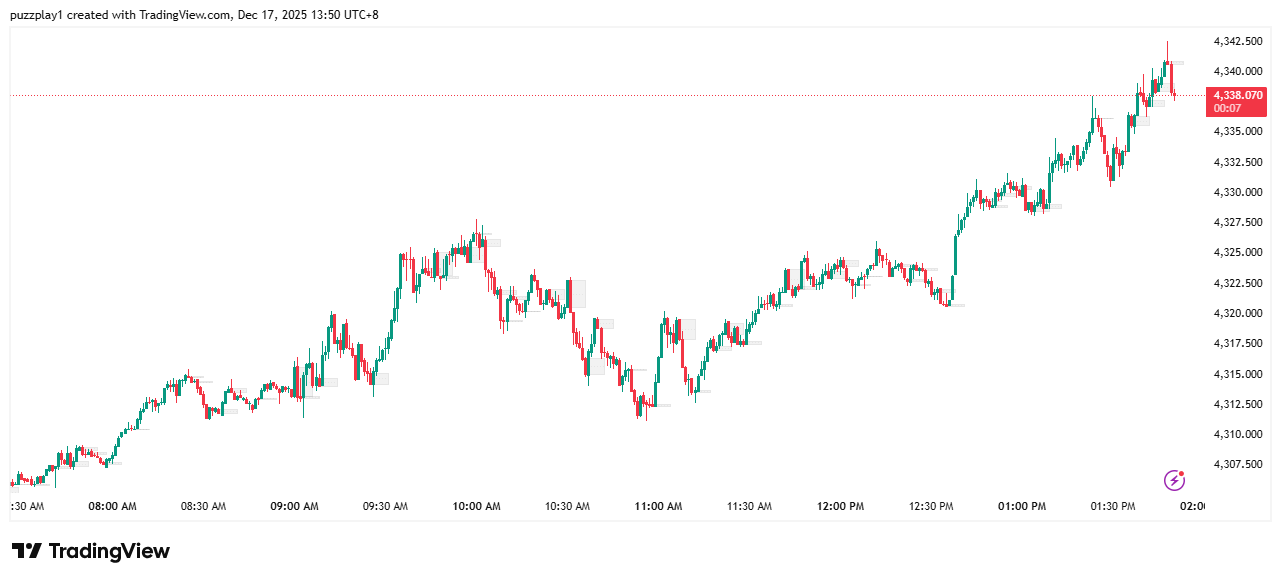